# Time Series Decomposition

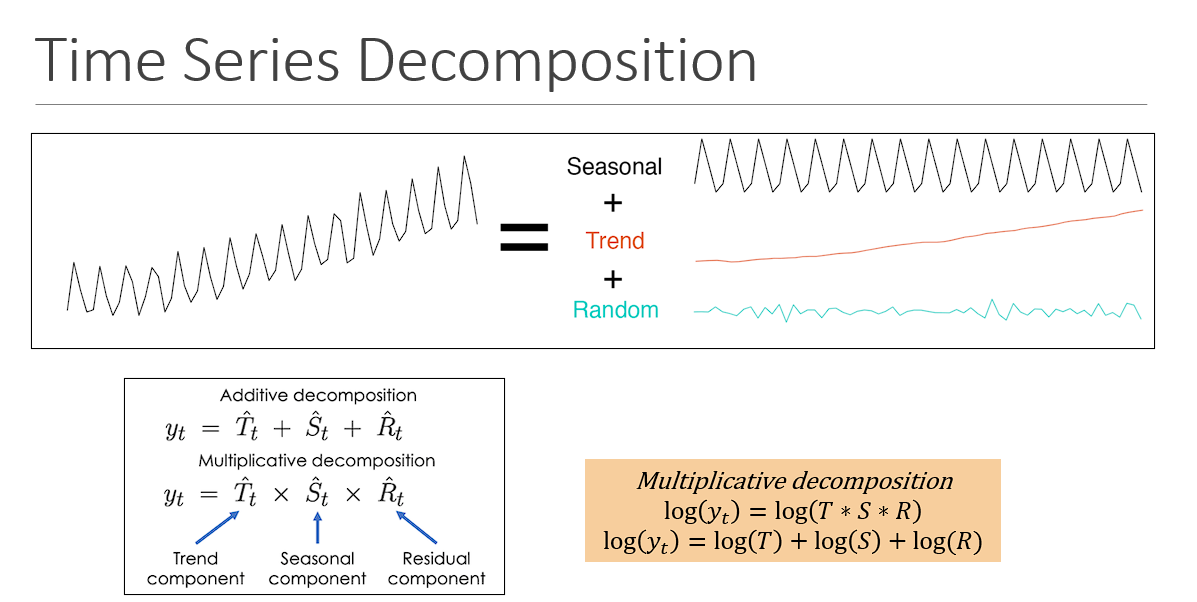

In [1]:
%pip install pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl (614 kB)
Using cached Cython-3.0.8-cp311-cp311-win_amd64.whl (2.8 MB)
   ---------------------------------------- 0.0/120.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/120.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/120.9 kB ? eta -:--:--
   ------------------- ------------------- 61.4/120.9 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 120.9/120.9 kB 1.0 MB/s eta 0:00:00


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataframe

In [8]:
import pandas as pd 
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
df.isna().sum()

#Passengers    0
dtype: int64

### Change the column name

In [12]:
df.columns = ['nPass']

In [30]:
df

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Visualizing the data

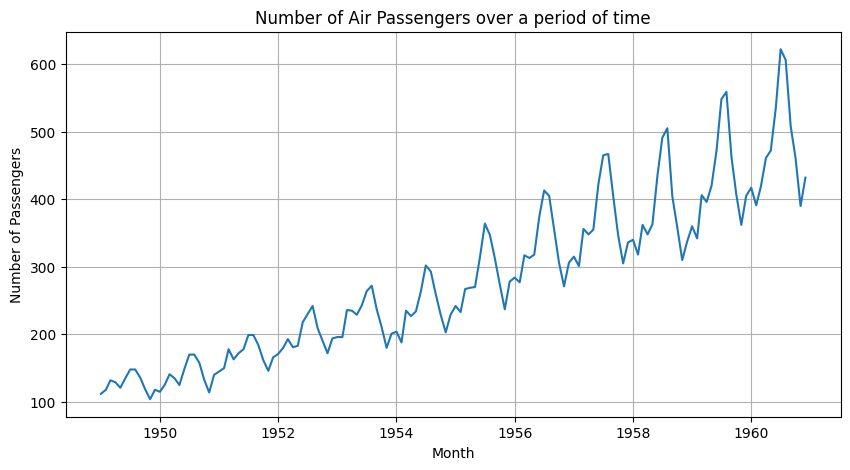

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers over a period of time')
plt.grid()
plt.show()

### Create a time series decomposition

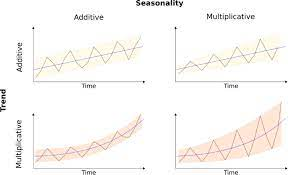

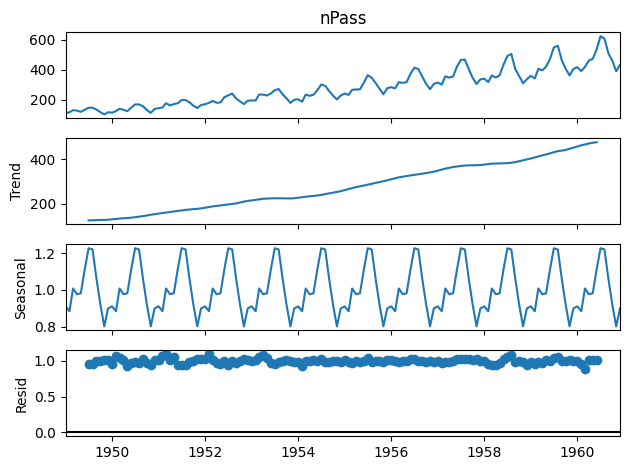

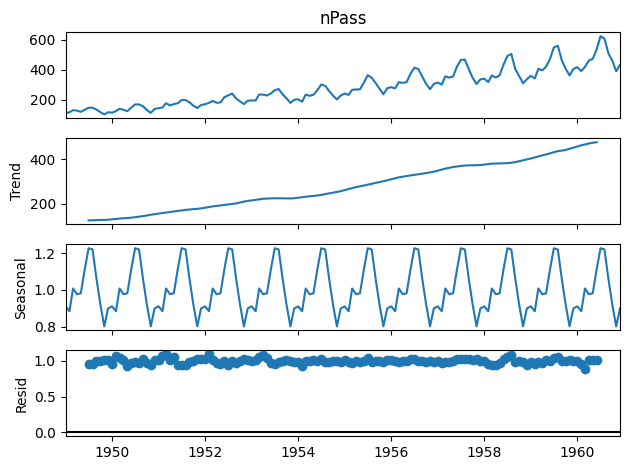

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['nPass'], model='multiplicative')
Q.plot()

In [18]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: nPass, Length: 144, dtype: float64

In [19]:
Q.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [20]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [21]:
Q.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

### Plotting trend

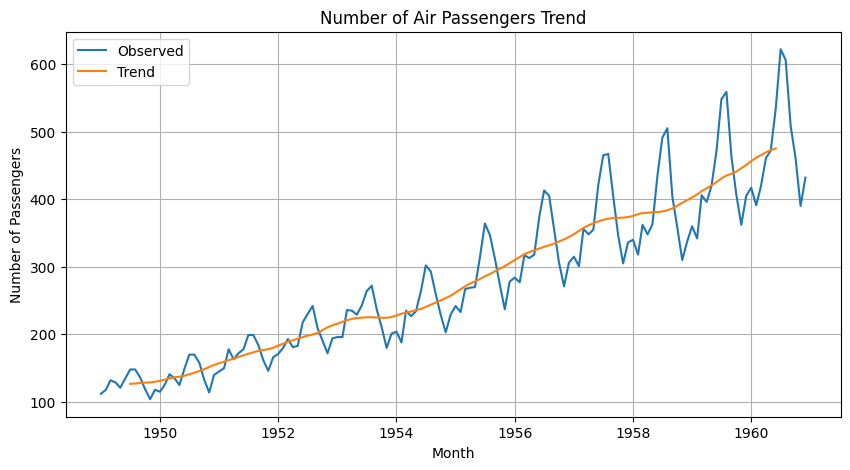

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'], label='Observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.legend()
plt.show()

### Seasonal plot

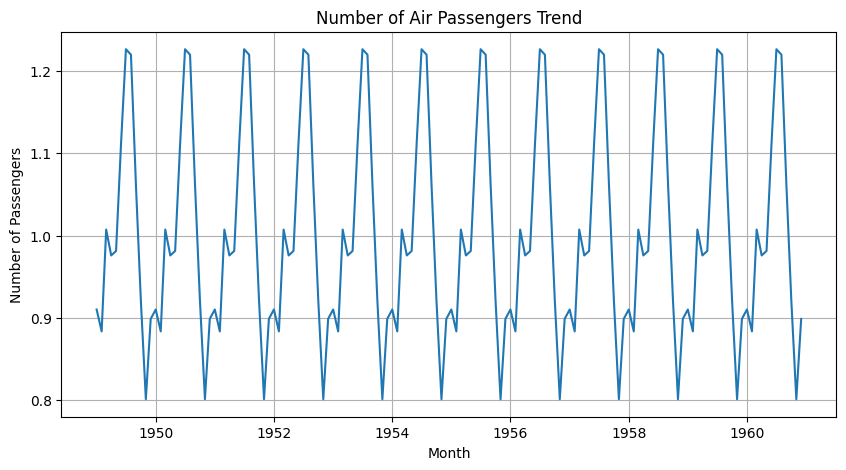

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.show()

### Plot the residuals

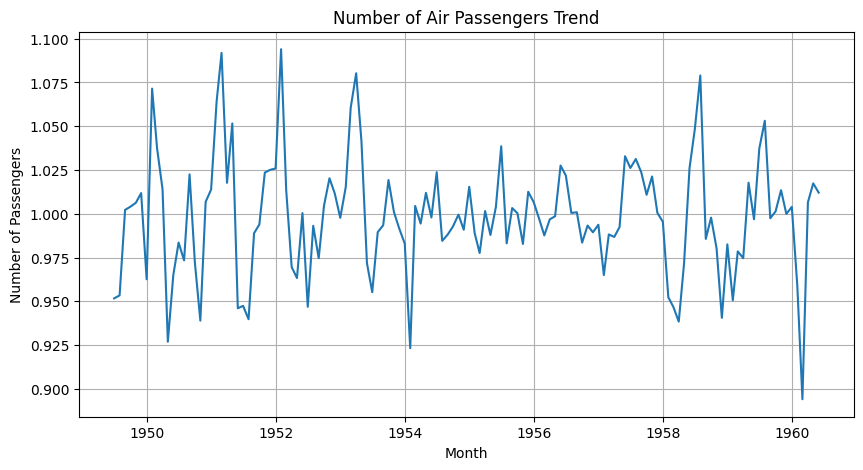

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Trend')
plt.grid()
plt.show()

### Time series forecasting

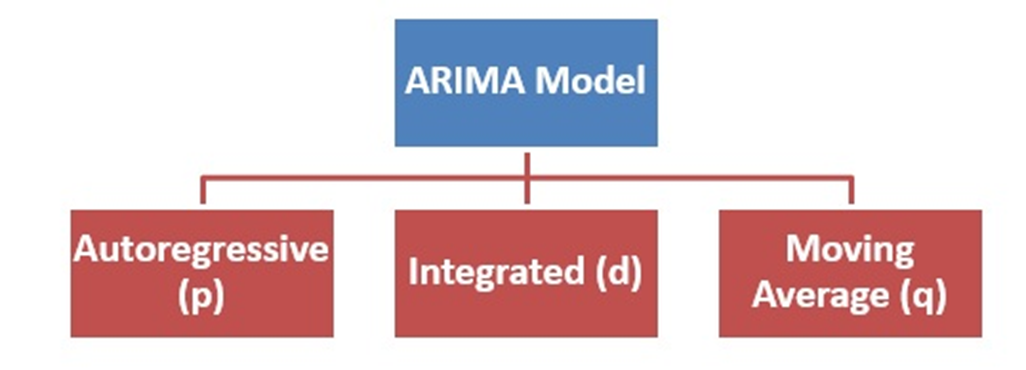

### Forecast next 3 years data - 3*12 = 36 months 

In [31]:
from pmdarima.arima import auto_arima
model = auto_arima(df['nPass'], m=12, seasonal=True)

In [32]:
model.order

(2, 1, 1)

### Forecasting

In [33]:
forecast, conf = model.predict(n_periods=36, return_conf_int=True)

In [35]:
forecast

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
1961-06-01    566.862550
1961-07-01    654.260284
1961-08-01    638.597604
1961-09-01    540.883864
1961-10-01    494.126748
1961-11-01    423.332841
1961-12-01    465.507712
1962-01-01    479.291026
1962-02-01    454.177037
1962-03-01    483.087203
1962-04-01    525.819493
1962-05-01    537.450950
1962-06-01    600.984197
1962-07-01    688.437307
1962-08-01    672.821614
1962-09-01    575.147743
1962-10-01    528.424456
1962-11-01    457.659254
1962-12-01    499.858481
1963-01-01    513.662462
1963-02-01    488.566008
1963-03-01    517.491053
1963-04-01    560.235969
1963-05-01    571.878138
1963-06-01    635.420475
1963-07-01    722.881298
1963-08-01    707.272149
1963-09-01    609.603831
1963-10-01    562.885256
1963-11-01    492.124052
1963-12-01    534.326671
Freq: MS, dtype: float64

In [36]:
conf

array([[423.34475094, 467.92511658],
       [394.23518302, 446.55490116],
       [419.83140846, 478.56534829],
       [460.37587373, 523.30417201],
       [470.37999658, 536.40913406],
       [532.69880168, 601.02629843],
       [619.22055901, 689.30000963],
       [602.87921604, 674.31599104],
       [504.63055231, 577.13717502],
       [457.44514984, 530.80834643],
       [386.3030106 , 460.36267117],
       [428.19044593, 502.82497842],
       [433.49653884, 525.08551376],
       [405.10774907, 503.24632483],
       [431.15437638, 535.02002912],
       [471.83916844, 579.79981805],
       [481.87209035, 593.02980929],
       [544.15500525, 657.81338881],
       [630.60709073, 746.26752372],
       [614.17741433, 731.46581272],
       [515.83056926, 634.46491613],
       [468.54219966, 588.30671331],
       [397.2952923 , 518.02321528],
       [439.07790127, 560.63906114],
       [446.32509131, 580.99983223],
       [418.31603539, 558.81598086],
       [444.62194643, 590.36015987],
 

In [38]:
df_forecast = pd.DataFrame(forecast)
df_forecast.columns = ['Forecast']
df_forecast

,Forecast
1961-01-01,445.634934
1961-02-01,420.395042
1961-03-01,449.198378
1961-04-01,491.840023
1961-05-01,503.394565
1961-06-01,566.862550
1961-07-01,654.260284
1961-08-01,638.597604
1961-09-01,540.883864
1961-10-01,494.126748


In [40]:
df_forecast[['Lower', 'Upper']] = conf

In [41]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,445.634934,423.344751,467.925117
1961-02-01,420.395042,394.235183,446.554901
1961-03-01,449.198378,419.831408,478.565348
1961-04-01,491.840023,460.375874,523.304172
1961-05-01,503.394565,470.379997,536.409134
1961-06-01,566.862550,532.698802,601.026298
1961-07-01,654.260284,619.220559,689.300010
1961-08-01,638.597604,602.879216,674.315991
1961-09-01,540.883864,504.630552,577.137175
1961-10-01,494.126748,457.445150,530.808346


In [42]:
df_forecast = df_forecast.apply(round)

In [43]:
df_forecast

,Forecast,Lower,Upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


### Visualize above forecast

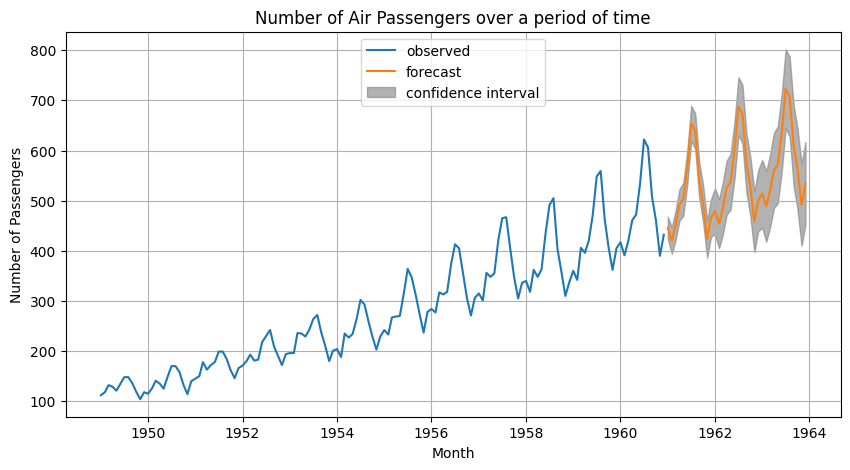

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df['nPass'], label='observed')
plt.plot(df_forecast['Forecast'], label='forecast')
plt.fill_between(x=df_forecast.index, y1=df_forecast['Lower'], y2=df_forecast['Upper'], color='gray', alpha=0.6, label='confidence interval')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers over a period of time')
plt.grid()
plt.legend(loc='upper center')
plt.show()

### Save above results to csv

In [50]:
df_forecast.to_csv('ARIMAResults.csv')